# Fetching the Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version= 1, as_frame= False) #if it's not set to false it returns a pandas dataframe, instead we want a numpy array
# for more details visit https://stackoverflow.com/questions/65506131/why-does-using-x0-in-mnist-classifier-code-give-me-an-error
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x.shape

(70000, 784)

In [7]:
some_digit = x[6900]
some_digit_image = some_digit.reshape(28,28)

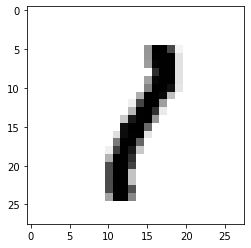

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")

(-0.5, 27.5, 27.5, -0.5)

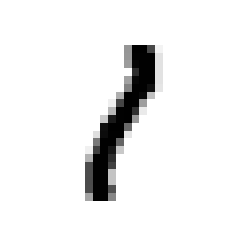

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [10]:
y[6900]

'1'

In [11]:
x_train, x_test = x[:60000], x[60000:]

In [12]:
y_train, y_test = y[:60000], y[60000:]

In [13]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a detector which detects 2

In [14]:
y_train = y_train.astype(np.int8) #datatype is that of a string and we want them as integers 
y_test = y_test.astype(np.int8)
y_train_1 = (y_train==1)
y_test_1 = (y_test==1)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(tol = 0.1)

In [17]:
clf.fit(x_train,y_train_1)

C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [18]:
clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train,y_train_1,scoring ="accuracy")

C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [20]:
a.mean()

0.9911833333333334

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train,y_train_1,cv=3)

C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [23]:
y_train_pred


array([False, False, False, ...,  True, False, False])

# Calculating Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1,y_train_pred)

array([[52921,   337],
       [  233,  6509]], dtype=int64)

# Precision and Recall

In [27]:
from sklearn.metrics import precision_score, recall_score


In [29]:
precision_score(y_train_1,y_train_pred)

0.950774174700555

In [31]:
recall_score(y_train_1,y_train_pred)

0.965440522100267

# Precision Recall Curve

In [32]:
from sklearn.metrics import precision_recall_curve

In [36]:
y_scores = cross_val_predict(clf, x_train,y_train_1,method ="decision_function")

C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajag\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [38]:
y_scores

array([ -7.6484222 , -29.22399438, -24.10280692, ...,   5.11860136,
       -26.36448056, -21.94668968])

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_train_1,y_scores)

# Plotting the precision recall curve

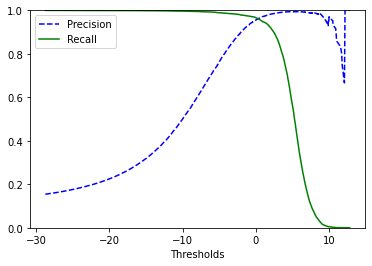

In [40]:
plt.plot(thresholds,precisions[:-1], "b--", label="Precision")
plt.plot(thresholds,recalls[:-1], 'g-',label='Recall')
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()